# Project 2

Space! The Final Frontier! The Great Fascination of all those born too late to explore the vast expanses of the Earth, and something I have personally been interested in for many years. So, for this classification project, I found myself wondering about the different kinds of stars out there, and how they differ, from luminosity, to size, to temperature. 

The dataset I used for this project was found on: https://www.kaggle.com/datasets/deepu1109/star-dataset/data

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

star_classes = pd.read_csv("6classcsv.csv")

In [3]:
star_classes.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


Now that our dataset is put into a frame, we can sort out a number of things. Starting off, I decided doing a count of the abundance of each color of star in what our dataset covers, and figure out a percentage of how common they are throughout our universe.

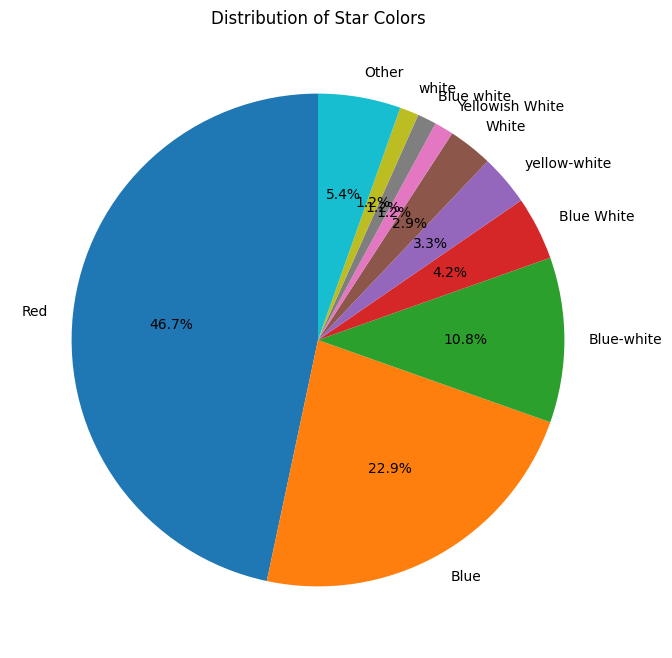

Star color
Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Yellowish White         3
Blue white              3
white                   3
Orange                  2
Whitish                 2
yellowish               2
Pale yellow orange      1
White-Yellow            1
Blue                    1
Yellowish               1
Orange-Red              1
Blue white              1
Blue-White              1
Name: count, dtype: int64
46.666666666666664


In [4]:
color_counts = star_classes["Star color"].value_counts()

total_stars = len(star_classes)
red_count = (star_classes["Star color"] == "Red").sum()

red_percentage = (red_count / total_stars) * 100

threshold = 2
major_colors = color_counts[color_counts > threshold]
other_count = color_counts[color_counts <= threshold].sum()
if other_count > 0:
    major_colors["Other"] = other_count
plt.figure(figsize=(8,8))
plt.pie(major_colors, labels=major_colors.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Star Colors")
plt.show()
print(color_counts)
print(red_percentage)

Above, we can see a distribution of the different colors of stars, and approximately how many of them we can expect to populate the universe. However, I think we can look deeper into it, by going by star type, then delving into color distribution there. That way, we can more accurately predict what type a star is by their color! We will first do this by making our dataset a bit smaller, to show us the more important things. By cutting it down to just 4 columns, our job becomes much easier.

In [46]:
cleaned = star_classes[["Star type", "Temperature (K)", "Star color", "Radius(R/Ro)", "Luminosity(L/Lo)"]]
cleaned.head()

,Star type,Temperature (K),Star color,Radius(R/Ro),Luminosity(L/Lo)
0,0,3068,Red,0.1700,0.002400
1,0,3042,Red,0.1542,0.000500
2,0,2600,Red,0.1020,0.000300
3,0,2800,Red,0.1600,0.000200
4,0,1939,Red,0.1030,0.000138


The next step in the process is to sort all the stars by different colors, and I group them somewhat loosely here, with them following a main color theme.

In [47]:
subset1 = cleaned[cleaned["Star color"].isin(["Red", "Orange-Red", "Orange"])][["Star type", "Temperature (K)", "Star color", "Radius(R/Ro)"]]
subset2 = cleaned[cleaned["Star color"].isin(["Blue-white", "Blue White", "Blue", "Blue white", "Blue-White"])][["Star type", "Temperature (K)", "Star color", "Radius(R/Ro)"]]
subset3 = cleaned[cleaned["Star color"].isin(["White", "white", "Whitish", "White-Yellow"])][["Star type", "Temperature (K)", "Star color", "Radius(R/Ro)"]]
subset4 = cleaned[cleaned["Star color"].isin(["Yellowish", "yellowish", "yellow-white", "Yellowish White", "Pale yellow orange"])][["Star type", "Temperature (K)", "Star color", "Radius(R/Ro)"]]

subset4.head()

,Star type,Temperature (K),Star color,Radius(R/Ro)
25,2,12990,Yellowish White,0.00984
27,2,7700,Yellowish White,0.01280
28,2,11790,Yellowish White,0.01100
29,2,7230,Pale yellow orange,0.01300
34,3,5800,yellow-white,0.90000


In [48]:
star_probs = (
    cleaned.groupby("Star color")["Star type"].value_counts(normalize=True).mul(100).rename("Percentage").reset_index()
)

star_probs

,Star color,Star type,Percentage
0,Blue,4,56.363636
1,Blue,2,21.818182
2,Blue,5,12.727273
3,Blue,3,9.090909
4,Blue,2,100.000000
5,Blue White,2,100.000000
6,Blue white,2,100.000000
7,Blue white,2,100.000000
8,Blue-White,3,100.000000
9,Blue-white,3,76.923077


Now that we have the percentages, I decided to make it a bit of an exercise to do with user input, and make a small user-input likelihood of each star being in which category based on their color.

In [49]:
lookup = (
    cleaned.groupby("Star color")["Star type"].value_counts(normalize=True).unstack(fill_value=0)
)
lookup

Star type,0,1,2,3,4,5
Star color,,,,,,
Blue,0.000000,0.000000,0.218182,0.090909,0.563636,0.127273
Blue,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
Blue White,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
Blue white,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
Blue white,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
Blue-White,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Blue-white,0.000000,0.000000,0.000000,0.769231,0.000000,0.230769
Orange,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
Orange-Red,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000


In [50]:
def predict_star_type():
    color = input("Enter star color: ").strip()
    if color in lookup.index:
        print(f"\nProbabilities for '{color}' stars:\n")
        print(lookup.loc[color] * 100)
    else:
        print("Color not found. Try one of:", list(lookup.index))

predict_star_type()


Probabilities for 'Blue' stars:

Star type
0     0.000000
1     0.000000
2    21.818182
3     9.090909
4    56.363636
5    12.727273
Name: Blue, dtype: float64


Finally, we can get a small glimpse of what working for a space organization might be like when it comes to the classification of stars. This is a simple, quick, and early step in the process of deciding what kind of star one is, but an important insight nonetheless. The impact of these classification processes and models are very significant in the exploration of the universe, and knowing more about our nearest and further stellar neighbors. Something more advanced than the very basic model above would probably look something like the following:

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder


X = cleaned[["Temperature (K)", "Radius(R/Ro)", "Star color", "Luminosity(L/Lo)"]].copy()
y = cleaned["Star type"]

# Preprocessing step, transforming the colors column by assigning all of the colors a numerical value.
le = LabelEncoder()
X["Star color"] = le.fit_transform(X["Star color"])


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.71      0.83         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        11

    accuracy                           0.96        48
   macro avg       0.97      0.95      0.95        48
weighted avg       0.97      0.96      0.96        48



Included above is an important cleaning step as well, specifically the encoding step. Since in our dataset the original color values were strings, we had to turn them into numerical values using the Label Encoder from the sklearn library. What this does is simply assign a value to each unique string in the Colors column, allowing a smooth classification report to be completed.

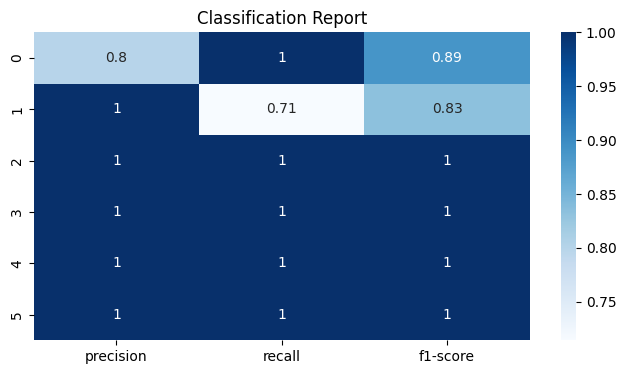

Radius(R/Ro)        0.554900
Luminosity(L/Lo)    0.239981
Temperature (K)     0.159057
Star color          0.046062
dtype: float64


In [54]:
import matplotlib.pyplot as plt

#Cleaning it up, and making the result look cleaner

report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()


plt.figure(figsize=(8,4))
sns.heatmap(report_df.iloc[:-3, :-1], annot=True, cmap="Blues")
plt.title("Classification Report")
plt.show()

feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))

The Random Forest we use to create this model compares all of the provided features to figure out the differences in what makes a specific entry a specific star type, and after the training it compares all the different entries against the rules it has learned through training to figure out what causes a star to be classified in each star type. The cool thing here is it allows us to look deeper into what the more important features are. The classification report is the result of the training showing us with what precision these 4 features account for star type.

As we can see, the most important features in terms of classifying star types are Radius, followed by Luminosity and Temperature, and finally Star Color, showing that despite our initial assumption that declaring star types by color is amateurish but somewhat accurate, we can tell that while color can tell us something about a star, it's the least important feature. By using multiple features and a proper classification model, we can actually get a proper insight of what places like NASA have to do when researching new stars.

References: Old projects of mine from studio for the classification models, and the dataset is linked at the top.